In [1]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import strategy_imitation, sarsa, ddqn, random_agent, a2c, model_based,graph_ai
import aa_gun,jet_table
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.
/home/sd/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sd/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sd/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sd/anaconda3/lib/python3.7/site-packages/tensorflow/python/fra

In [2]:
#массовый тест моделей

In [3]:
#Проверь на зенитке, на cartpole и на mountain car
EPISODES=1400

print('_____',pd.Timestamp.now())
#здесь весь код от инициализации модели до выдачи scores.
# In case of CartPole-v1, maximum length of episode is 500

env = jet_table.jet_table_env()
#env = gym.make('Seaquest-ramNoFrameskip-v0')
#env=CartPoleEnv9()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

#agent = sarsa.SarsaAgent(state_size, action_size)
agent = graph_ai.GraphAI(state_size, action_size)
agent.rl.train_start=340
#agent.train_start=7000
#agent.epsilon_decay=0.9999
agent.render=True

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]
agent.epsilon = 1

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    

    while not done:
        if (e in range(0,3)) or (e in range(20,22)) or (e in range(30,32)) or (e in range(40,42)) or (e in range(50,52)) or (e in range(100,103)) or (e in range(200,202)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
            if agent.render:
                env.render()

        # get action for the current state and go one step in environment
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100


        # save the sample <s, a, r, s'> to the replay memory
        agent.append_sample(state, action, reward, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #

        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")
            try:
                print("episode:", e, "  score:", score,np.mean(scores), "  memory length:",
                      len(agent.rl.s), "  epsilon:", agent.epsilon)
            except Exception:
                print("episode:", e, "  score:", score,np.mean(scores), "  memory length:",
                      len(agent.rl.s), "  epsilon:", agent.epsilon)


_____ 2020-05-05 22:26:21.417834




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0

self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e+01', ',3.24000000e+02,5.00000000e-02,-4.75000000e-02,-1.70553164e+01,-1.63492285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36258563e+01', ',3.01000000e+02,-6.89968750e-03,-7.97200671e-02,-1.71363846e+01,-1.67763995e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39813106e+01', ',3.39000000e+02,4.26250000e-02,

self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e+01', ',3.24000000e+02,5.00000000e-02,-4.75000000e-02,-1.70553164e+01,-1.63492285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36258563e+01', ',3.01000000e+02,-6.89968750e-03,-7.97200671e-02,-1.71363846e+01,-1.67763995e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39813106e+01', ',3.39000000e+02,4.26250000e-02,

str(edges_coord[i][0]) ,2.25000000e+02,9.03687500e-02,9.51250000e-02,-1.74279685e+01,-1.61938348e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37902159e+01
str(edges_coord[i][1]) ,3.15000000e+02,-1.07708135e-01,2.50206005e-02,-1.73758509e+01,-1.65357015e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39864466e+01
self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e+01', ',3.24000000e+02,5.00000000e-02,-4.75000000e-02,-1.70553164e+01,-1.63492285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36258563e+01', ',3.01000000e+02,-6.89968750e-03,-7.97200671e-02,-1.71363846e+01,-1.67763995e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39813106e+01', ',3.39000000e+02,4.26250000e-02,

self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e+01', ',3.24000000e+02,5.00000000e-02,-4.75000000e-02,-1.70553164e+01,-1.63492285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36258563e+01', ',3.01000000e+02,-6.89968750e-03,-7.97200671e-02,-1.71363846e+01,-1.67763995e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39813106e+01', ',3.39000000e+02,4.26250000e-02,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 1/2
340/340 [==============================] - 1s 3ms/step - loss: 5.2405
Epoch 2/2
340/340 [==============================] - 0s 36us/step - loss: 4.1309
Epoch 1/2
340/340 [==============================] - 0s 32us/step - loss: 4.2269
Epoch 2/2
340/340 [==============================] - 0s 35us/step - loss: 4.2084
Epoch 1/2
340/340 [==============================] - 0s 38us/step - loss: 3.8132
Epoch 2/2
340/340 [==============================] - 0s 38us/step - loss: 4.2643
Epoch 1/2
340/340 [==============================] - 0s 36us/step - loss: 4.4750
Epoch 2/2
340/340 [==============================] - 0s 32us/step - loss: 3.9729
Epoch 1/2
340/340 [==============================] - 0s 38us/step - loss: 3.7562
Epoch 2/2
340/340 [==============================] - 0s 35us/step - loss: 3.7032
Epoch 1/2
340/340 [==============================] - 0s 38us/step - loss: 3.8936
Epoch 2/2
340/340 [==============================] - 0s 35us/step - loss: 4.9045
Epoch 1/2
340/340 [==========

self.graph.nodes [',7.70000000e+01,-9.01320979e-03,-6.30903618e-02,-1.71729834e+01,-1.63610807e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.37191129e+01', ',3.23000000e+02,0.00000000e+00,-5.00000000e-02,-1.70053164e+01,-1.63967285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36227324e+01', ',3.34000000e+02,-9.75000000e-02,0.00000000e+00,-1.70527728e+01,-1.60057366e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.33876177e+01', ',3.27000000e+02,9.52437500e-02,-4.07253125e-02,-1.71956851e+01,-1.62205094e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36388771e+01', ',3.24000000e+02,5.00000000e-02,-4.75000000e-02,-1.70553164e+01,-1.63492285e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36258563e+01', ',3.01000000e+02,-6.89968750e-03,-7.97200671e-02,-1.71363846e+01,-1.67763995e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.39813106e+01', ',3.39000000e+02,4.26250000e-02,

NetworkXNoPath: No path to ,3.,0.,0.,-17.,-16.9525,1.,1.,1.,1.,-24.00806648.

In [10]:
import networkx as nx

In [ ]:
s1 = ',3.40000000e+02,-9.50625000e-03,4.07253125e-02,-1.71870790e+01,-1.62569557e+01,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,-2.36576477e+01'
s2 = ',3.,0.,0.,-17.,-16.9525,1.,1.,1.,1.,-24.00806648'

In [6]:
len(agent.graph.edges)

1294

In [7]:
len(agent.edges)

1294

In [ ]:
#проблема. Иногда нет пути к этому состоянию. Как фиксить?
#Неплохо бы настроить как-то фильтрацию рёбер графа, чтобы нельзя было сделать граф несвязным

In [8]:
nx.algorithms.shortest_path(agent.graph, s1, s2, weight='length')

NameError: name 'nx' is not defined

In [ ]:
nx.algorithms.shortest_path_length(agent.graph, s1, s2, weight='length')

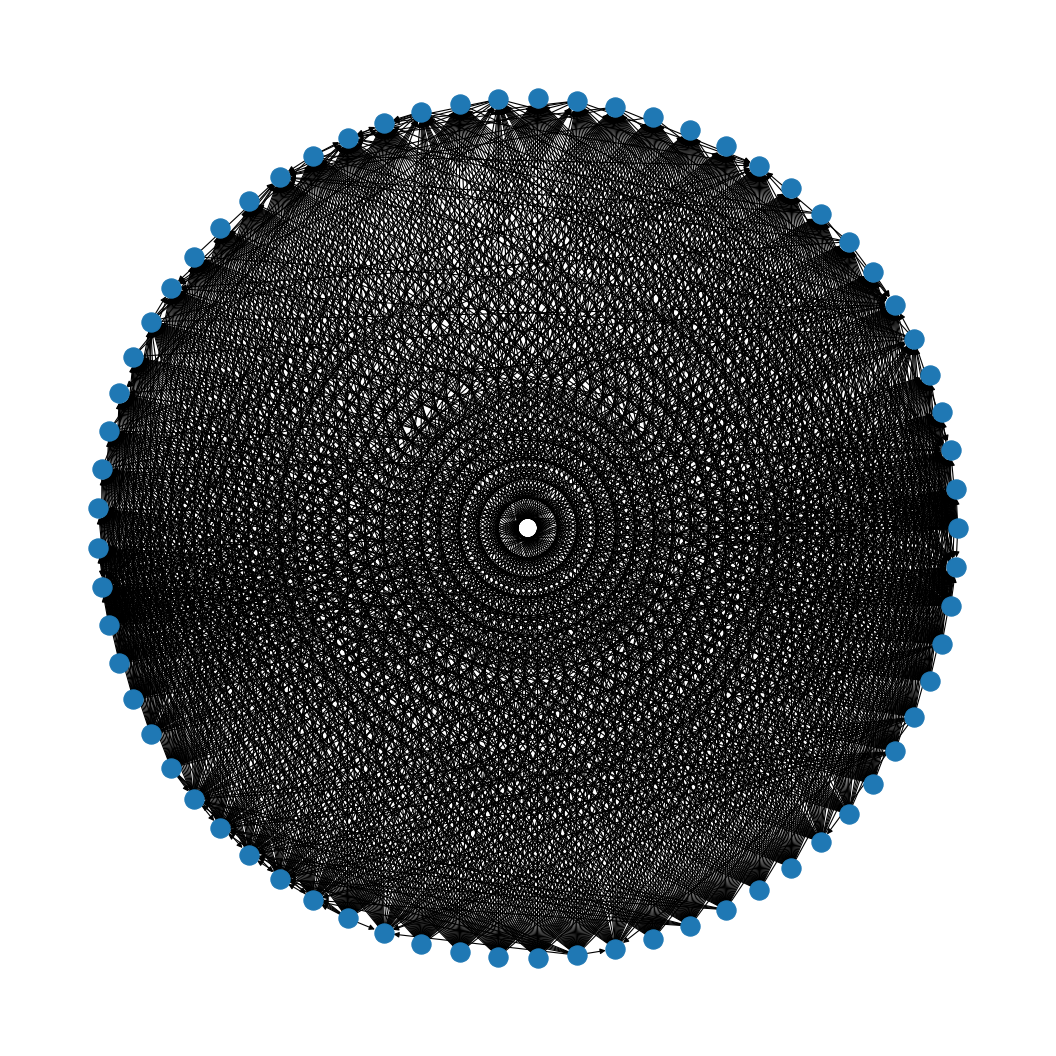

In [12]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 13), dpi=80, facecolor='w', edgecolor='k')
#nx.draw_networkx_edges(agent.graph, nx.spring_layout(agent.graph), edgelist=None, width=1.0, edge_color='k', style='solid', alpha=1.0, edge_cmap=None, edge_vmin=None, edge_vmax=None, ax=None, arrows=True, label=None)
#nx.draw_spectral(agent.graph)
nx.draw_circular(agent.graph)

In [ ]:
lst = list(agent.graph.edges.values())

In [ ]:
lst

In [ ]:
list(agent.graph.nodes)

In [ ]:
#Кажется, проблема в фильтрации. Она делает так, что граф теряет связность. Новые точки не подцепляются